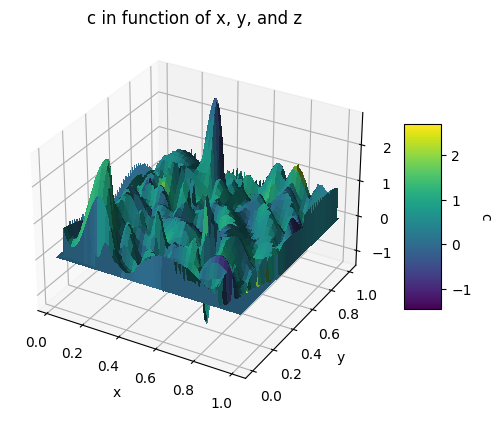

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming x, y, z, and c are defined

# Transform x and y into 2D grids
x1 = np.linspace(x.min(), x.max(), len(np.unique(x)))
y1 = np.linspace(y.min(), y.max(), len(np.unique(y)))
x2, y2 = np.meshgrid(x1, y1)

# Interpolation of Z: old X-Y to the new X-Y grid
z2 = griddata((x, y), z, (x2, y2), method='cubic', fill_value=z.min())

# Interpolation of C: old X-Y on the new X-Y grid
c2 = griddata((x, y), c, (x2, y2), method='cubic', fill_value=c.min())

# Normalize color dimension
minn, maxx = c2.min(), c2.max()
norm = plt.Normalize(minn, maxx)
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.get_cmap('viridis'))
mappable.set_array([])
fcolors = mappable.to_rgba(c2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x2, y2, z2, facecolors=fcolors, linewidth=0, antialiased=False)

# Add colorbar
cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(list_name_variables[index_c], rotation=270)

# Set labels and title
ax.set_xlabel(list_name_variables[index_x])
ax.set_ylabel(list_name_variables[index_y])
ax.set_zlabel(list_name_variables[index_z])
plt.title('%s in function of %s, %s, and %s' % (list_name_variables[index_c], 
                                                list_name_variables[index_x], 
                                                list_name_variables[index_y], 
                                                list_name_variables[index_z]))

plt.show()
